#Prediction - Volume of Cylinder- V=πr2h
#SGD Regressor - Stochastic gradient descent

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html


###Importing Libraries

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

### Authenticate and create the PyDrive client.
### Implementing Google Authentication

In [0]:
# Authenticate and create the PyDrive client.
#!pip install -U -q PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [3]:
link = 'https://drive.google.com/open?id=1Hv1air7_C_pSC_Gco-KUHcczgshdLU-f'
f,id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('CylinderVolumeData.csv')  
dfTrain = pd.read_csv('CylinderVolumeData.csv')
dfTrain.head()



,radius,height,volume
0,0.5,0.0,0.0
1,1.0,0.0,0.0
2,1.5,0.0,0.0
3,2.0,0.0,0.0
4,2.5,0.0,0.0


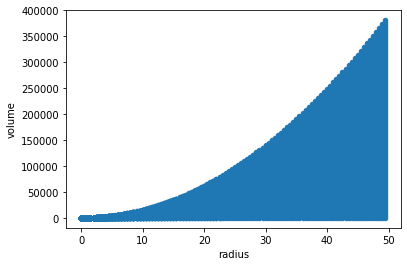

In [4]:
dfTrain.plot(x='radius',y='volume',kind='scatter')
plt.show()

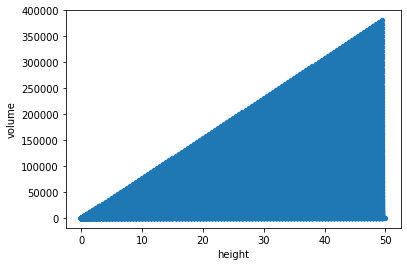

In [5]:
dfTrain.plot(x='height',y='volume',kind='scatter')
plt.show()

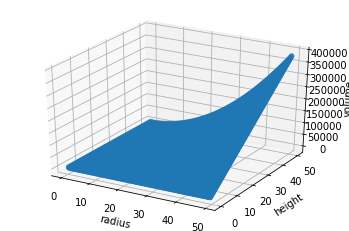

In [6]:
#%matplotlib notebook
plt3D = plt.figure().gca(projection='3d')
plt3D.scatter(dfTrain['radius'], dfTrain['height'], dfTrain['volume'])
plt3D.set_xlabel('radius')
plt3D.set_ylabel('height')
plt3D.set_zlabel('volume')
plt.show()

#MapFeature - This function is used to provide 2 level degree to the independent variables


In [0]:
def mapFeature(X,degree):
    
    sz=X.shape[1]
    if (sz==2):
        sz=(degree+1)*(degree+2)/2
        sz=int(sz)
    else:
         sz=degree+1
    out=np.ones((X.shape[0],sz))     #Adding Bias W0

    sz=X.shape[1]
    if (sz==2):
        X1=X[:, 0:1]
        X2=X[:, 1:2]
        col=1
        for i in range(1,degree+1):        
            for j in range(0,i+1):
                out[:,col:col+1]= np.multiply(np.power(X1,i-j),np.power(X2,j))    
                col+=1
        return out
    else:
        for i in range(1,degree+1):        
            out[:,i:i+1]= np.power(X,i)
    
    return out

In [0]:
import sklearn.linear_model  as LR

df_Features=dfTrain.iloc[:,0:2]
df_Label=dfTrain.iloc[:,2:3]

X = df_Features.values
Y = df_Label.values.ravel()


#Strandard Scaler - Data Preprocessing


In [0]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
scaler = StandardScaler()
scaler.fit(X)
XS = scaler.transform(X)
inputX = mapFeature(XS,3) 






#### Using SGD Regressor predict volume for following values
     radius=189
     height=177
     
     Volume should be approx 19863087.12

In [35]:
#Prediction
#eta - learning rate
#learning rate adaptive.
RegObj = LR.SGDRegressor(learning_rate='adaptive',eta0=0.1,alpha=0,max_iter=1000).fit(inputX,Y)
pred = RegObj.predict(mapFeature(scaler.transform([[189,177]]),3) )
print(pred)

#pred1 = RegObj.predict(mapFeature((X),3) )
#print('Prediction ' , pred1)


#print([19863087.12])
#49.5,49.5,381035.5263
#y_pred = RegObj.intercept_ + (RegObj.coef_ * inputX)
#print('Prediction y = mx+c',y_pred)



[19863087.11948307]
Prediction  [7.94700444e+04 1.19401271e+05 1.67432741e+05 ... 1.24420983e+09
 1.26886422e+09 1.43640968e+06]


#You can obtain the coefficient of determination (𝑅²) with .score() called on model:
#When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².

In [12]:
#You can obtain the coefficient of determination (𝑅²) with .score() called on model:
#When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².
print('coefficient of determination:', RegObj.score(inputX,Y))
#The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:
print('intercept:', RegObj.intercept_)
print('slope:', RegObj.coef_)

coefficient of determination: 1.0
intercept: [23819.53144667]
slope: [ 2.38195314e+04  5.55617182e+04  2.77754130e+04  1.62004894e+04
  3.23946269e+04 -1.00133244e-07  4.11212748e-07  9.44551081e+03
 -3.58980667e-08 -2.30920309e-07]


###Plotting

In [0]:
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
u = np.linspace(x_min, x_max,10) 
v = np.linspace(y_min, y_max, 10) 
z = np.zeros(( len(u), len(v) )) 
U,V=np.meshgrid(u,v)
for i in range(len(u)): 
    for j in range(len(v)): 
        uv= np.column_stack((np.array([[u[i]]]),np.array([[v[j]]])))
        pred = RegObj.predict(mapFeature(scaler.transform(uv),3) )
     
        z[i,j] =pred[0]
z = np.transpose(z) 


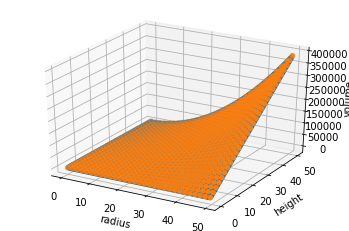

In [20]:
#%matplotlib notebook
plt3D = plt.figure().gca(projection='3d')
plt3D.scatter(dfTrain['radius'], dfTrain['height'], dfTrain['volume'])
plt3D.scatter(U,V,z)
plt3D.set_xlabel('radius')
plt3D.set_ylabel('height')
plt3D.set_zlabel('volume')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'color', 's'
  This is separate from the ipykernel package so we can avoid doing imports until


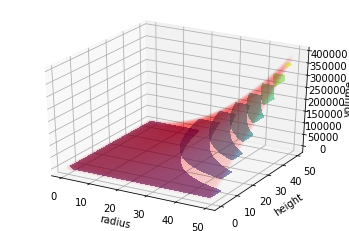

In [18]:
#Contour Graph 
plt3D = plt.figure().gca(projection='3d')
plt3D.scatter(dfTrain['radius'], dfTrain['height'], dfTrain['volume'],alpha=0.01,color='r')
plt3D.contourf(U,V,z,color='b',alpha=0.6)
plt3D.set_xlabel('radius')
plt3D.set_ylabel('height')
plt3D.set_zlabel('volume')
plt.show()

In [16]:
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
u = np.linspace(x_min, x_max,30) 
v = np.linspace(y_min, y_max, 30) 
z = np.zeros(( len(u), len(v) )) 
U,V=np.meshgrid(u,v)

UV= np.column_stack((U.flatten(),V.flatten()))
print(UV.shape)
pred = RegObj.predict(mapFeature(scaler.transform(UV),3) )

z = pred.reshape(z.shape)



(900, 2)


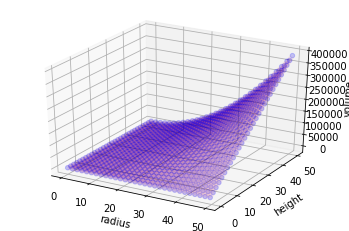

In [17]:
# Graph  - Without Mesh Grid
plt3D = plt.figure().gca(projection='3d')
plt3D.scatter(dfTrain['radius'], dfTrain['height'], dfTrain['volume'],alpha=0.01,color='r')
plt3D.scatter(U,V,z,color='b',alpha=0.2)
plt3D.set_xlabel('radius')
plt3D.set_ylabel('height')
plt3D.set_zlabel('volume')
plt.show()


# Links
http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Notes/IPython%20Notebook%20-%20Regression.html

https://sdsawtelle.github.io/blog/output/week6-andrew-ng-machine-learning-with-python.html


##R Square
https://www.riskprep.com/component/exam/?view=exam&layout=detail&id=131


